In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scout.utils import read_csv

In [24]:
working_dir = '/data/datasets/organoid_phenotyping/analysis/zika_vs_mock/'
os.listdir(working_dir)

['example_roi_Artifacts.pdf',
 'example_roi_Adjacent.pdf',
 'example_roi_Surface-DN.pdf',
 'cyto_zika_umap.pdf',
 'example_roi_DN.pdf',
 'cyto_profiles_combined.npy',
 'Zika',
 'average_profile_DN.pdf',
 'analysis.csv',
 'cyto_clusters_umap.pdf',
 'umap_zika_vs_mock.pdf',
 'average_profile_Artifacts.pdf',
 'volcano_plot_zika.pdf',
 'average_profile_Surface-DN.pdf',
 'model_zikv.umap',
 'cyto_profiles_combined_samples.npy',
 'clustermap_zika_hits.pdf',
 'example_roi_Surface-TBR1.pdf',
 'Zika_mock',
 'cyto_labels_combined.npy',
 'average_profile_Surface-TBR1.pdf',
 'zikv_with_FC.xlsx',
 'average_profile_Adjacent.pdf',
 'combined_features.xlsx']

In [33]:
analysis = pd.read_csv(os.path.join(working_dir, 'analysis.csv'), index_col=0)

analysis['folder'] = analysis['type']

# Swap Zika 1 for Ctrl 1, and Zika 5 for Ctrl 5
z1_idx = ['zika1' in p for p in analysis.index].index(True)
z5_idx = ['zika5' in p for p in analysis.index].index(True)
c1_idx = ['ctrl1' in p for p in analysis.index].index(True)
c5_idx = ['ctrl5' in p for p in analysis.index].index(True)

analysis['type'].iloc[z1_idx] = 'Zika_mock'
analysis['type'].iloc[z5_idx] = 'Zika_mock'
analysis['type'].iloc[c1_idx] = 'Zika'
analysis['type'].iloc[c5_idx] = 'Zika'

analysis

,type,folder
path,,
20190625_14_48_13_AA_ef24-zika1_488LP15_561LP140_642LP50,Zika_mock,Zika
20190625_15_22_42_AA_ef24-zika2_488LP20_561LP140_642LP50,Zika,Zika
20190625_16_04_10_AA_ef24-zika3_488LP18_561LP140_642LP50,Zika,Zika
20190625_16_22_54_AA_ef24-zika4_488LP18_561LP140_642LP50,Zika,Zika
20190625_16_31_09_AA_ef24-zika5_488LP14_561LP140_642LP50,Zika_mock,Zika
20190625_17_15_27_AA_ef24-zika6_488LP25_561LP140_642LP50,Zika,Zika
20190625_12_18_15_AA_ef24-ctrl1_488LP14_561LP140_642LP50,Zika,Zika_mock
20190625_12_38_41_AA_ef24-ctrl2_488LP13_561LP140_642LP50,Zika_mock,Zika_mock
20190625_13_00_22_AA_ef24-ctrl3_488LP15_561LP140_642LP50,Zika_mock,Zika_mock


In [26]:
dfs = []
for org_path in analysis.index:
    folder = analysis.loc[org_path]['folder']
    path = os.path.join(working_dir, folder, org_path, 'individual_ventricle_cellfreq.xlsx')
    df = pd.read_excel(path, index_col=0)
    df['type'] = len(df) * [analysis.loc[org_path]['type']]
    dfs.append(df)
df = pd.concat(dfs)
df.head()

,sox2_count,tbr1_count,dn_count,sox2_freq,tbr1_freq,dn_freq,eq_diam,volume,type
0,180555,632422,298172,0.162494,0.569160,0.268346,172.568518,2.690812e+06,Zika_mock
1,38690,117858,67378,0.172780,0.526326,0.300894,101.057807,5.403912e+05,Zika_mock
2,102160,228414,305992,0.160486,0.358822,0.480692,155.557359,1.970926e+06,Zika_mock
3,158785,516369,382291,0.150159,0.488318,0.361523,174.838026,2.798378e+06,Zika_mock
4,116990,897016,212288,0.095401,0.731485,0.173113,197.085106,4.008298e+06,Zika_mock


## Look at cell counts and frequency vs morphology

In [27]:
df_zika = df.where(df['type'] == 'Zika').dropna()
df_mock = df.where(df['type'] == 'Zika_mock').dropna()

df_zika.shape, df_mock.shape

((314, 9), (1198, 9))

KeyError: 'org_idx'

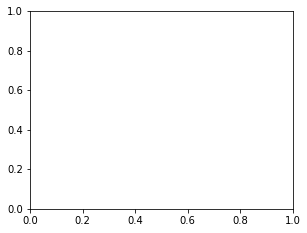

In [28]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 3, 1)
for i in df_mock['org_idx'].unique():
    sns.scatterplot(x='eq_diam', y='sox2_freq', data=df_mock.where(df_mock['org_idx'] == i), label=f'Organoid {i}')
plt.ylim([0, 1])
plt.subplot(2, 3, 2)
for i in df_mock['org_idx'].unique():
    sns.scatterplot(x='eq_diam', y='tbr1_freq', data=df_mock.where(df_mock['org_idx'] == i))
plt.ylim([0, 1])
plt.subplot(2, 3, 3)
for i in df_mock['org_idx'].unique():
    sns.scatterplot(x='eq_diam', y='dn_freq', data=df_mock.where(df_mock['org_idx'] == i))
plt.ylim([0, 1])

plt.subplot(2, 3, 4)
for i in df_zika['org_idx'].unique():
    sns.scatterplot(x='eq_diam', y='sox2_freq', data=df_zika.where(df_zika['org_idx'] == i), label=f'Organoid {i}')
plt.ylim([0, 1])
plt.subplot(2, 3, 5)
for i in df_zika['org_idx'].unique():
    sns.scatterplot(x='eq_diam', y='tbr1_freq', data=df_zika.where(df_zika['org_idx'] == i))
plt.ylim([0, 1])
plt.subplot(2, 3, 6)
for i in df_zika['org_idx'].unique():
    sns.scatterplot(x='eq_diam', y='dn_freq', data=df_zika.where(df_zika['org_idx'] == i))
plt.ylim([0, 1])

plt.show()

In [29]:
data_flatten = {'freq': pd.concat([df_mock['sox2_freq'], df_mock['tbr1_freq'], df_mock['dn_freq']]),
                'type': len(df_mock) * ['SOX2'] + len(df_mock) * ['TBR1'] + len(df_mock) * ['DN'],
                'eq_diam': 3 * list(df_mock['eq_diam'])}
df_mock_flatten = pd.DataFrame(data_flatten)

data_flatten = {'freq': pd.concat([df_zika['sox2_freq'], df_zika['tbr1_freq'], df_zika['dn_freq']]),
                'type': len(df_zika) * ['SOX2'] + len(df_zika) * ['TBR1'] + len(df_zika) * ['DN'],
                'eq_diam': 3 * list(df_zika['eq_diam'])}
df_zika_flatten = pd.DataFrame(data_flatten)

df_mock_flatten.shape, df_zika_flatten.shape

((3594, 3), (942, 3))

In [30]:
from scipy import stats

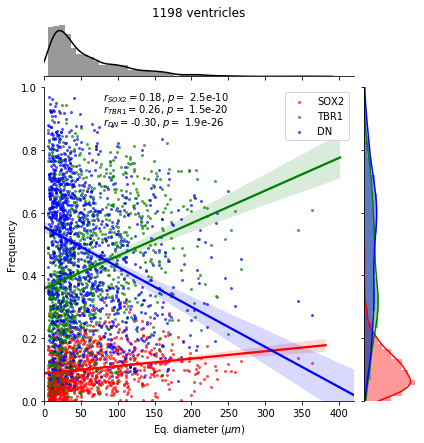

In [31]:
p = sns.JointGrid(x='eq_diam', y='freq', data=df_mock_flatten)

sns.regplot(x='eq_diam', y='sox2_freq', data=df_mock, ax=p.ax_joint, color='r', scatter_kws={'s': 4, 'alpha': 0.6}, label='SOX2')
sns.regplot(x='eq_diam', y='tbr1_freq', data=df_mock, ax=p.ax_joint, color='g', scatter_kws={'s': 4, 'alpha': 0.6}, label='TBR1')
sns.regplot(x='eq_diam', y='dn_freq', data=df_mock, ax=p.ax_joint, color='b', scatter_kws={'s': 4, 'alpha': 0.6}, label='DN')

sns.distplot(df_mock_flatten['eq_diam'], ax=p.ax_marg_x, color='k')
sns.distplot(df_mock['sox2_freq'], ax=p.ax_marg_y, color='r', vertical=True)
sns.distplot(df_mock['tbr1_freq'], ax=p.ax_marg_y, color='g', vertical=True)
sns.distplot(df_mock['dn_freq'], ax=p.ax_marg_y, color='b', vertical=True)

p.ax_joint.set_xlim([0, 420])
p.ax_joint.set_ylim([0, 1])
p.ax_joint.legend()
p.ax_marg_x.set_title("{} ventricles".format(len(df_mock)))
p.ax_joint.set_xlabel('Eq. diameter ($\mu m$)')
p.ax_marg_x.set_xlabel(None)
p.ax_joint.set_ylabel('Frequency')
p.ax_marg_y.set_ylabel(None)

# Get pearson correlations

r_sox2, p_sox2 = stats.pearsonr(df_mock['eq_diam'], df_mock['sox2_freq'])
r_tbr1, p_tbr1 = stats.pearsonr(df_mock['eq_diam'], df_mock['tbr1_freq'])
r_dn, p_dn = stats.pearsonr(df_mock['eq_diam'], df_mock['dn_freq'])

p.ax_joint.annotate('$r_{SOX2}=$' + f'{r_sox2:0.2f}, $p=$ {p_sox2:.1e}', [80, 0.96])
p.ax_joint.annotate('$r_{TBR1}=$' + f'{r_tbr1:0.2f}, $p=$ {p_tbr1:.1e}', [80, 0.92])
p.ax_joint.annotate('$r_{DN}=$' + f'{r_dn:0.2f}, $p=$ {p_dn:.1e}', [80, 0.88])

plt.show()

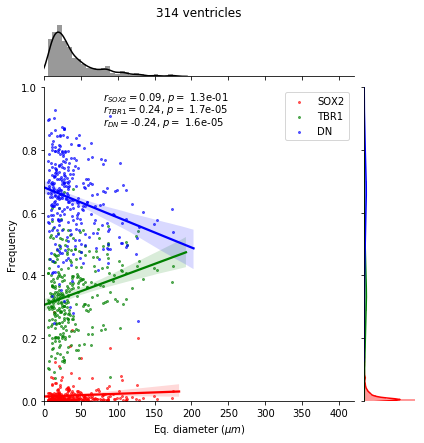

In [32]:
p = sns.JointGrid(x='eq_diam', y='freq', data=df_zika_flatten)

sns.regplot(x='eq_diam', y='sox2_freq', data=df_zika, ax=p.ax_joint, color='r', scatter_kws={'s': 4, 'alpha': 0.6}, label='SOX2')
sns.regplot(x='eq_diam', y='tbr1_freq', data=df_zika, ax=p.ax_joint, color='g', scatter_kws={'s': 4, 'alpha': 0.6}, label='TBR1')
sns.regplot(x='eq_diam', y='dn_freq', data=df_zika, ax=p.ax_joint, color='b', scatter_kws={'s': 4, 'alpha': 0.6}, label='DN')

sns.distplot(df_zika_flatten['eq_diam'], ax=p.ax_marg_x, color='k')
sns.distplot(df_zika['sox2_freq'], ax=p.ax_marg_y, color='r', vertical=True)
sns.distplot(df_zika['tbr1_freq'], ax=p.ax_marg_y, color='g', vertical=True)
sns.distplot(df_zika['dn_freq'], ax=p.ax_marg_y, color='b', vertical=True)

p.ax_joint.set_xlim([0, 420])
p.ax_joint.set_ylim([0, 1])
p.ax_joint.legend()
p.ax_marg_x.set_title("{} ventricles".format(len(df_zika)))
p.ax_joint.set_xlabel('Eq. diameter ($\mu m$)')
p.ax_marg_x.set_xlabel(None)
p.ax_joint.set_ylabel('Frequency')
p.ax_marg_y.set_ylabel(None)

# Get pearson correlations

r_sox2, p_sox2 = stats.pearsonr(df_zika['eq_diam'], df_zika['sox2_freq'])
r_tbr1, p_tbr1 = stats.pearsonr(df_zika['eq_diam'], df_zika['tbr1_freq'])
r_dn, p_dn = stats.pearsonr(df_zika['eq_diam'], df_zika['dn_freq'])

p.ax_joint.annotate('$r_{SOX2}=$' + f'{r_sox2:0.2f}, $p=$ {p_sox2:.1e}', [80, 0.96])
p.ax_joint.annotate('$r_{TBR1}=$' + f'{r_tbr1:0.2f}, $p=$ {p_tbr1:.1e}', [80, 0.92])
p.ax_joint.annotate('$r_{DN}=$' + f'{r_dn:0.2f}, $p=$ {p_dn:.1e}', [80, 0.88])

plt.show()

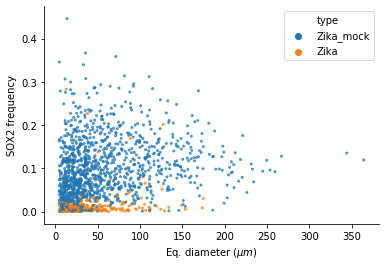

In [45]:
sns.scatterplot(x='eq_diam', y='sox2_freq', hue='type', data=df, edgecolor=None, s=5, alpha=0.7)
plt.xlabel('Eq. diameter ($\mu m$)')
plt.ylabel('SOX2 frequency')
sns.despine()
plt.show()

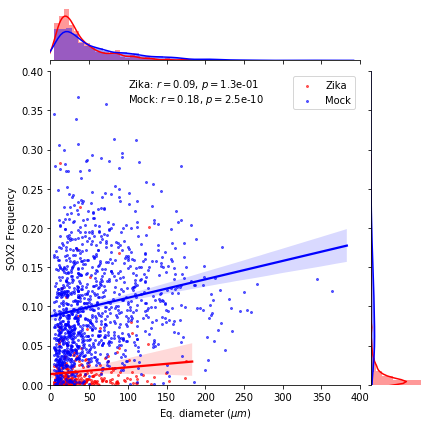

In [63]:
p = sns.JointGrid(x='eq_diam', y='freq', data=df_zika_flatten)

sns.regplot(x='eq_diam', y='sox2_freq', data=df_zika, ax=p.ax_joint, color='r', scatter_kws={'s': 4, 'alpha': 0.6}, label='Zika')
sns.regplot(x='eq_diam', y='sox2_freq', data=df_mock, ax=p.ax_joint, color='b', scatter_kws={'s': 4, 'alpha': 0.6}, label='Mock')

sns.distplot(df_zika_flatten['eq_diam'], ax=p.ax_marg_x, color='r')
sns.distplot(df_zika['sox2_freq'], ax=p.ax_marg_y, color='r', vertical=True)
sns.distplot(df_mock_flatten['eq_diam'], ax=p.ax_marg_x, color='b')
sns.distplot(df_mock['sox2_freq'], ax=p.ax_marg_y, color='b', vertical=True)

p.ax_joint.set_xlim([0, 400])
p.ax_joint.set_ylim([0, 0.4])
p.ax_joint.legend()
p.ax_joint.set_xlabel('Eq. diameter ($\mu m$)')
p.ax_marg_x.set_xlabel(None)
p.ax_joint.set_ylabel('SOX2 Frequency')
p.ax_marg_y.set_ylabel(None)

# Get pearson correlations

r_sox2, p_sox2 = stats.pearsonr(df_zika['eq_diam'], df_zika['sox2_freq'])
p.ax_joint.annotate('Zika: $r=$' + f'{r_sox2:0.2f}, $p=${p_sox2:.1e}', [100, 0.38])

r_sox2, p_sox2 = stats.pearsonr(df_mock['eq_diam'], df_mock['sox2_freq'])
p.ax_joint.annotate('Mock: $r=$' + f'{r_sox2:0.2f}, $p=${p_sox2:.1e}', [100, 0.36])

plt.savefig(os.path.join(working_dir, 'ventricle_size_vs_sox2_freq.pdf'), bbox_inches='tight')
plt.show()

- d35 feature correlations
    - significant correlations across scales identified in heatmap and graph
    - SOX2, TBR1, DN counts correlated with organoid and ventricle size
    - SOX2 is especially central in the graph, which makes sense developmentally
- Cell populations near individual ventricles
    - If overall counts of cell populations change with organoid size, does this relationship hold near individual ventricles?
    - Sort of... cell frequencies within 300um show signficant correlations with ventricle size
    - These correlations remain significant for X out of Y organoids **TODO**
    - Suggests that indivdual organoids show a distribution of ventricle sizes, which are at different maturation states
- d35 vs d60 mean differences 
    - Signficant differences show expansion of DN and TBR1 cells, larger organoids, more variable ventricles, less adjacent cytoarchitecture
    - Increased ventricle variability suggests repeating the cell populations analysis around ventricles **TODO**
        - Probably wider spreads on the marginal distributions

**Q:** *How consistent is the correlation between ventricle size and cell-type frequencies?*

**A:** Out of 12 d35 organoids, 11 (92%) showed significant correlation between ventricle size and TBR1 and DN frequency near ventricles. 5 (42%) of these 11 showed significant correlation between ventricle size and SOX2 frequency near ventricles. These correlations hold at the intra-organoid level--as opposed to just the inter-organoid or batch level--suggesting that invididual organoids contain a distribution of neurodevelopmental phenotypes linked to individual ventricles. *Intra-organoid, ventricle-specific heterogeneity*

[ 5 11 11] [0.41666667 0.91666667 0.91666667]


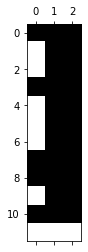

In [280]:
org_names = df['org_name'].unique()

R = np.zeros((len(org_names), 3))
P = np.zeros((len(org_names), 3))
for i, org in enumerate(org_names):
    df_org = df.where(df['org_name'] == org).dropna()    
    r_sox2, p_sox2 = stats.pearsonr(df_org['eq_diam'], df_org['sox2_freq'])
    r_tbr1, p_tbr1 = stats.pearsonr(df_org['eq_diam'], df_org['tbr1_freq'])
    r_dn, p_dn = stats.pearsonr(df_org['eq_diam'], df_org['dn_freq'])
    R[i, :] = np.asarray([r_sox2, r_tbr1, r_dn])
    P[i, :] = np.asarray([p_sox2, p_tbr1, p_dn])

count_sig = (P < 0.05).sum(axis=0)
print(count_sig, count_sig / 12)

plt.spy(P < 0.05)
plt.show()

### Zika vs mock

In [371]:
working_dir = '/data/datasets/organoid_phenotyping/analysis/zika_vs_mock/'
analysis = pd.read_csv(os.path.join(working_dir, 'analysis.csv'), index_col=0)
analysis

,type
path,
20190625_14_48_13_AA_ef24-zika1_488LP15_561LP140_642LP50,Zika
20190625_15_22_42_AA_ef24-zika2_488LP20_561LP140_642LP50,Zika
20190625_16_04_10_AA_ef24-zika3_488LP18_561LP140_642LP50,Zika
20190625_16_22_54_AA_ef24-zika4_488LP18_561LP140_642LP50,Zika
20190625_16_31_09_AA_ef24-zika5_488LP14_561LP140_642LP50,Zika
20190625_17_15_27_AA_ef24-zika6_488LP25_561LP140_642LP50,Zika
20190625_12_18_15_AA_ef24-ctrl1_488LP14_561LP140_642LP50,Zika_mock
20190625_12_38_41_AA_ef24-ctrl2_488LP13_561LP140_642LP50,Zika_mock
20190625_13_00_22_AA_ef24-ctrl3_488LP15_561LP140_642LP50,Zika_mock


In [372]:
# Swap Zika 1 for Ctrl 1, and Zika 5 for Ctrl 5
z1_idx = ['zika1' in p for p in analysis.index].index(True)
z5_idx = ['zika5' in p for p in analysis.index].index(True)
c1_idx = ['ctrl1' in p for p in analysis.index].index(True)
c5_idx = ['ctrl5' in p for p in analysis.index].index(True)

analysis['folder'] = analysis['type']

analysis['type'].iloc[z1_idx] = 'Zika_mock'
analysis['type'].iloc[z5_idx] = 'Zika_mock'
analysis['type'].iloc[c1_idx] = 'Zika'
analysis['type'].iloc[c5_idx] = 'Zika'

analysis

,type,folder
path,,
20190625_14_48_13_AA_ef24-zika1_488LP15_561LP140_642LP50,Zika_mock,Zika
20190625_15_22_42_AA_ef24-zika2_488LP20_561LP140_642LP50,Zika,Zika
20190625_16_04_10_AA_ef24-zika3_488LP18_561LP140_642LP50,Zika,Zika
20190625_16_22_54_AA_ef24-zika4_488LP18_561LP140_642LP50,Zika,Zika
20190625_16_31_09_AA_ef24-zika5_488LP14_561LP140_642LP50,Zika_mock,Zika
20190625_17_15_27_AA_ef24-zika6_488LP25_561LP140_642LP50,Zika,Zika
20190625_12_18_15_AA_ef24-ctrl1_488LP14_561LP140_642LP50,Zika,Zika_mock
20190625_12_38_41_AA_ef24-ctrl2_488LP13_561LP140_642LP50,Zika_mock,Zika_mock
20190625_13_00_22_AA_ef24-ctrl3_488LP15_561LP140_642LP50,Zika_mock,Zika_mock


In [373]:
dfs_mock = []
dfs_zika = []
for i, org_path in enumerate(analysis.index):
    folder = analysis.loc[org_path]['folder']
    condition = analysis.loc[org_path]['type']
    path = os.path.join(working_dir, folder, org_path, 'individual_ventricle_cellfreq.xlsx')
    df = pd.read_excel(path, index_col=0)
    df['org_name'] = len(df) * [org_path]
    df['org_idx'] = len(df) * [i]
    if condition == 'Zika_mock':
        dfs_mock.append(df)
    elif condition == 'Zika':
        dfs_zika.append(df)
df_mock = pd.concat(dfs_mock).dropna()
df_zika = pd.concat(dfs_zika).dropna()

df_mock.shape, df_zika.shape

((1198, 10), (314, 10))

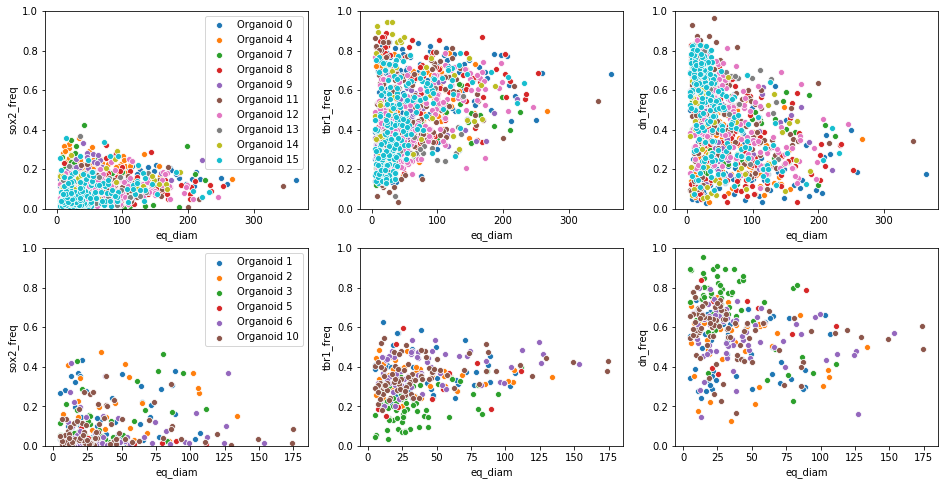

In [374]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 3, 1)
for i in df_mock['org_idx'].unique():
    sns.scatterplot(x='eq_diam', y='sox2_freq', data=df_mock.where(df_mock['org_idx'] == i), label=f'Organoid {i}')
plt.ylim([0, 1])
plt.subplot(2, 3, 2)
for i in df_mock['org_idx'].unique():
    sns.scatterplot(x='eq_diam', y='tbr1_freq', data=df_mock.where(df_mock['org_idx'] == i))
plt.ylim([0, 1])
plt.subplot(2, 3, 3)
for i in df_mock['org_idx'].unique():
    sns.scatterplot(x='eq_diam', y='dn_freq', data=df_mock.where(df_mock['org_idx'] == i))
plt.ylim([0, 1])

plt.subplot(2, 3, 4)
for i in df_zika['org_idx'].unique():
    sns.scatterplot(x='eq_diam', y='sox2_freq', data=df_zika.where(df_zika['org_idx'] == i), label=f'Organoid {i}')
plt.ylim([0, 1])
plt.subplot(2, 3, 5)
for i in df_zika['org_idx'].unique():
    sns.scatterplot(x='eq_diam', y='tbr1_freq', data=df_zika.where(df_zika['org_idx'] == i))
plt.ylim([0, 1])
plt.subplot(2, 3, 6)
for i in df_zika['org_idx'].unique():
    sns.scatterplot(x='eq_diam', y='dn_freq', data=df_zika.where(df_zika['org_idx'] == i))
plt.ylim([0, 1])

plt.show()

In [375]:
data_flatten = {'freq': pd.concat([df_mock['sox2_freq'], df_mock['tbr1_freq'], df_mock['dn_freq']]),
                'type': len(df_mock) * ['SOX2'] + len(df_mock) * ['TBR1'] + len(df_mock) * ['DN'],
                'eq_diam': 3 * list(df_mock['eq_diam'])}
df_mock_flatten = pd.DataFrame(data_flatten)

data_flatten = {'freq': pd.concat([df_zika['sox2_freq'], df_zika['tbr1_freq'], df_zika['dn_freq']]),
                'type': len(df_zika) * ['SOX2'] + len(df_zika) * ['TBR1'] + len(df_zika) * ['DN'],
                'eq_diam': 3 * list(df_zika['eq_diam'])}
df_zika_flatten = pd.DataFrame(data_flatten)

df_mock_flatten.shape, df_zika_flatten.shape

((3594, 3), (942, 3))

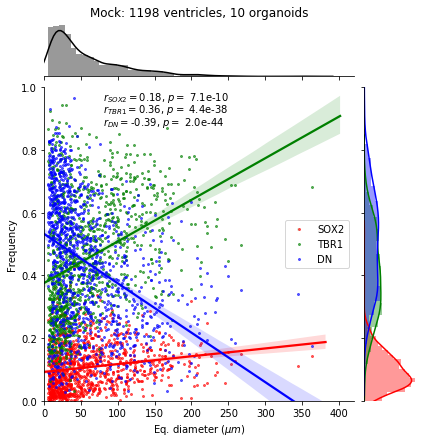

In [376]:
p = sns.JointGrid(x='eq_diam', y='freq', data=df_mock_flatten)

sns.regplot(x='eq_diam', y='sox2_freq', data=df_mock, ax=p.ax_joint, color='r', scatter_kws={'s': 4, 'alpha': 0.6}, label='SOX2')
sns.regplot(x='eq_diam', y='tbr1_freq', data=df_mock, ax=p.ax_joint, color='g', scatter_kws={'s': 4, 'alpha': 0.6}, label='TBR1')
sns.regplot(x='eq_diam', y='dn_freq', data=df_mock, ax=p.ax_joint, color='b', scatter_kws={'s': 4, 'alpha': 0.6}, label='DN')

sns.distplot(df_mock_flatten['eq_diam'], ax=p.ax_marg_x, color='k')
sns.distplot(df35['sox2_freq'], ax=p.ax_marg_y, color='r', vertical=True)
sns.distplot(df35['tbr1_freq'], ax=p.ax_marg_y, color='g', vertical=True)
sns.distplot(df35['dn_freq'], ax=p.ax_marg_y, color='b', vertical=True)

p.ax_joint.set_xlim([0, 420])
p.ax_joint.set_ylim([0, 1])
p.ax_joint.legend()
p.ax_marg_x.set_title("Mock: {} ventricles, {} organoids".format(len(df_mock), len(df_mock['org_idx'].unique())))
p.ax_joint.set_xlabel('Eq. diameter ($\mu m$)')
p.ax_marg_x.set_xlabel(None)
p.ax_joint.set_ylabel('Frequency')
p.ax_marg_y.set_ylabel(None)

# Get pearson correlations

r_sox2, p_sox2 = stats.pearsonr(df_mock['eq_diam'], df_mock['sox2_freq'])
r_tbr1, p_tbr1 = stats.pearsonr(df_mock['eq_diam'], df_mock['tbr1_freq'])
r_dn, p_dn = stats.pearsonr(df_mock['eq_diam'], df_mock['dn_freq'])

p.ax_joint.annotate('$r_{SOX2}=$' + f'{r_sox2:0.2f}, $p=$ {p_sox2:.1e}', [80, 0.96])
p.ax_joint.annotate('$r_{TBR1}=$' + f'{r_tbr1:0.2f}, $p=$ {p_tbr1:.1e}', [80, 0.92])
p.ax_joint.annotate('$r_{DN}=$' + f'{r_dn:0.2f}, $p=$ {p_dn:.1e}', [80, 0.88])

plt.show()

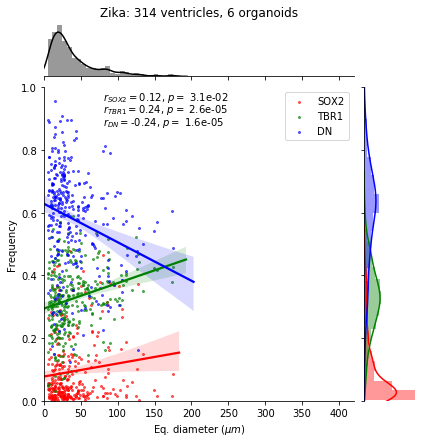

In [377]:
p = sns.JointGrid(x='eq_diam', y='freq', data=df_zika_flatten)

sns.regplot(x='eq_diam', y='sox2_freq', data=df_zika, ax=p.ax_joint, color='r', scatter_kws={'s': 4, 'alpha': 0.6}, label='SOX2')
sns.regplot(x='eq_diam', y='tbr1_freq', data=df_zika, ax=p.ax_joint, color='g', scatter_kws={'s': 4, 'alpha': 0.6}, label='TBR1')
sns.regplot(x='eq_diam', y='dn_freq', data=df_zika, ax=p.ax_joint, color='b', scatter_kws={'s': 4, 'alpha': 0.6}, label='DN')

sns.distplot(df_zika_flatten['eq_diam'], ax=p.ax_marg_x, color='k')
sns.distplot(df_zika['sox2_freq'], ax=p.ax_marg_y, color='r', vertical=True)
sns.distplot(df_zika['tbr1_freq'], ax=p.ax_marg_y, color='g', vertical=True)
sns.distplot(df_zika['dn_freq'], ax=p.ax_marg_y, color='b', vertical=True)

p.ax_joint.set_xlim([0, 420])
p.ax_joint.set_ylim([0, 1])
p.ax_joint.legend()
p.ax_marg_x.set_title("Zika: {} ventricles, {} organoids".format(len(df_zika), len(df_zika['org_idx'].unique())))
p.ax_joint.set_xlabel('Eq. diameter ($\mu m$)')
p.ax_marg_x.set_xlabel(None)
p.ax_joint.set_ylabel('Frequency')
p.ax_marg_y.set_ylabel(None)

# Get pearson correlations

r_sox2, p_sox2 = stats.pearsonr(df_zika['eq_diam'], df_zika['sox2_freq'])
r_tbr1, p_tbr1 = stats.pearsonr(df_zika['eq_diam'], df_zika['tbr1_freq'])
r_dn, p_dn = stats.pearsonr(df_zika['eq_diam'], df_zika['dn_freq'])

p.ax_joint.annotate('$r_{SOX2}=$' + f'{r_sox2:0.2f}, $p=$ {p_sox2:.1e}', [80, 0.96])
p.ax_joint.annotate('$r_{TBR1}=$' + f'{r_tbr1:0.2f}, $p=$ {p_tbr1:.1e}', [80, 0.92])
p.ax_joint.annotate('$r_{DN}=$' + f'{r_dn:0.2f}, $p=$ {p_dn:.1e}', [80, 0.88])

plt.show()

### Arlotta vs Lancaster

In [347]:
working_dir = '/data/datasets/organoid_phenotyping/analysis/arlotta_vs_lancaster/'
analysis = pd.read_csv(os.path.join(working_dir, 'analysis.csv'), index_col=0)
analysis.head()

,type
path,
20190722_16_28_25_ef26_org1_488LP15_561LP140_642LP40,Arlotta_d56
20190722_17_48_57_ef26_org2_488LP14_561LP140_642LP40,Arlotta_d56
20190722_18_32_43_ef26_org3_488LP14_561LP140_642LP40,Arlotta_d56
20190722_19_18_01_ef26_org4_488LP14_561LP140_642LP40,Arlotta_d56
20190723_11_41_12_ef26_org5_488LP14_561LP140_642LP40,Arlotta_d56


In [348]:
dfs_lancaster = []
dfs_arlotta = []
for i, org_path in enumerate(analysis.index):
    folder = analysis.loc[org_path]['type']
    path = os.path.join(working_dir, folder, org_path, 'individual_ventricle_cellfreq.xlsx')
    df = pd.read_excel(path, index_col=0)
    df['org_name'] = len(df) * [org_path]
    df['org_idx'] = len(df) * [i]
    if folder == 'Lancaster_d60':
        dfs_lancaster.append(df)
    elif folder == 'Arlotta_d56':
        dfs_arlotta.append(df)
df_lancaster = pd.concat(dfs_lancaster).dropna()
df_arlotta = pd.concat(dfs_arlotta).dropna()

df_lancaster.shape, df_arlotta.shape

((1336, 10), (556, 10))

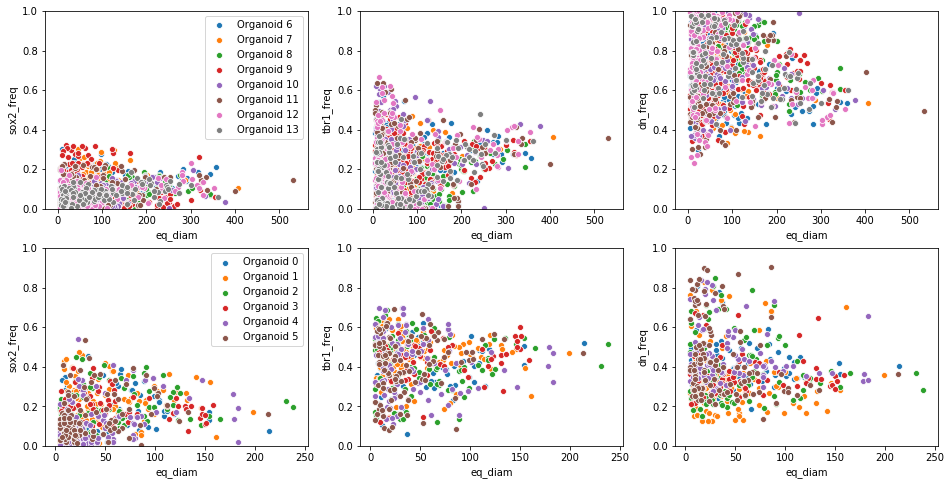

In [349]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 3, 1)
for i in df_lancaster['org_idx'].unique():
    sns.scatterplot(x='eq_diam', y='sox2_freq', data=df_lancaster.where(df_lancaster['org_idx'] == i), label=f'Organoid {i}')
plt.ylim([0, 1])
plt.subplot(2, 3, 2)
for i in df_lancaster['org_idx'].unique():
    sns.scatterplot(x='eq_diam', y='tbr1_freq', data=df_lancaster.where(df_lancaster['org_idx'] == i))
plt.ylim([0, 1])
plt.subplot(2, 3, 3)
for i in df_lancaster['org_idx'].unique():
    sns.scatterplot(x='eq_diam', y='dn_freq', data=df_lancaster.where(df_lancaster['org_idx'] == i))
plt.ylim([0, 1])

plt.subplot(2, 3, 4)
for i in df_arlotta['org_idx'].unique():
    sns.scatterplot(x='eq_diam', y='sox2_freq', data=df_arlotta.where(df_arlotta['org_idx'] == i), label=f'Organoid {i}')
plt.ylim([0, 1])
plt.subplot(2, 3, 5)
for i in df_arlotta['org_idx'].unique():
    sns.scatterplot(x='eq_diam', y='tbr1_freq', data=df_arlotta.where(df_arlotta['org_idx'] == i))
plt.ylim([0, 1])
plt.subplot(2, 3, 6)
for i in df_arlotta['org_idx'].unique():
    sns.scatterplot(x='eq_diam', y='dn_freq', data=df_arlotta.where(df_arlotta['org_idx'] == i))
plt.ylim([0, 1])

plt.show()

In [350]:
data_flatten = {'freq': pd.concat([df_lancaster['sox2_freq'], df_lancaster['tbr1_freq'], df_lancaster['dn_freq']]),
                'type': len(df_lancaster) * ['SOX2'] + len(df_lancaster) * ['TBR1'] + len(df_lancaster) * ['DN'],
                'eq_diam': 3 * list(df_lancaster['eq_diam'])}
df_lancaster_flatten = pd.DataFrame(data_flatten)

data_flatten = {'freq': pd.concat([df_arlotta['sox2_freq'], df_arlotta['tbr1_freq'], df_arlotta['dn_freq']]),
                'type': len(df_arlotta) * ['SOX2'] + len(df_arlotta) * ['TBR1'] + len(df_arlotta) * ['DN'],
                'eq_diam': 3 * list(df_arlotta['eq_diam'])}
df_arlotta_flatten = pd.DataFrame(data_flatten)

df_lancaster_flatten.shape, df_arlotta_flatten.shape

((4008, 3), (1668, 3))

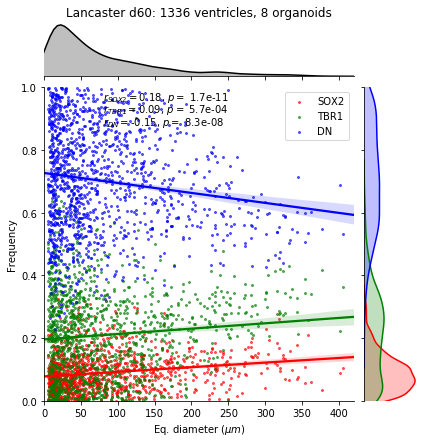

In [405]:
p = sns.JointGrid(x='eq_diam', y='freq', data=df_lancaster_flatten)

sns.regplot(x='eq_diam', y='sox2_freq', data=df_lancaster, ax=p.ax_joint, color='r', scatter_kws={'s': 4, 'alpha': 0.6}, label='SOX2')
sns.regplot(x='eq_diam', y='tbr1_freq', data=df_lancaster, ax=p.ax_joint, color='g', scatter_kws={'s': 4, 'alpha': 0.6}, label='TBR1')
sns.regplot(x='eq_diam', y='dn_freq', data=df_lancaster, ax=p.ax_joint, color='b', scatter_kws={'s': 4, 'alpha': 0.6}, label='DN')

sns.distplot(df_lancaster_flatten['eq_diam'], ax=p.ax_marg_x, color='k', hist=False, kde_kws={'shade': True})
sns.distplot(df_lancaster['sox2_freq'], ax=p.ax_marg_y, color='r', vertical=True, hist=False, kde_kws={'shade': True})
sns.distplot(df_lancaster['tbr1_freq'], ax=p.ax_marg_y, color='g', vertical=True, hist=False, kde_kws={'shade': True})
sns.distplot(df_lancaster['dn_freq'], ax=p.ax_marg_y, color='b', vertical=True, hist=False, kde_kws={'shade': True})

p.ax_joint.set_xlim([0, 420])
p.ax_joint.set_ylim([0, 1])
p.ax_joint.legend()
p.ax_marg_x.set_title("Lancaster d60: {} ventricles, {} organoids".format(len(df_lancaster), len(df_lancaster['org_idx'].unique())))
p.ax_joint.set_xlabel('Eq. diameter ($\mu m$)')
p.ax_marg_x.set_xlabel(None)
p.ax_joint.set_ylabel('Frequency')
p.ax_marg_y.set_ylabel(None)

# Get pearson correlations

r_sox2, p_sox2 = stats.pearsonr(df_lancaster['eq_diam'], df_lancaster['sox2_freq'])
r_tbr1, p_tbr1 = stats.pearsonr(df_lancaster['eq_diam'], df_lancaster['tbr1_freq'])
r_dn, p_dn = stats.pearsonr(df_lancaster['eq_diam'], df_lancaster['dn_freq'])

p.ax_joint.annotate('$r_{SOX2}=$' + f'{r_sox2:0.2f}, $p=$ {p_sox2:.1e}', [80, 0.96])
p.ax_joint.annotate('$r_{TBR1}=$' + f'{r_tbr1:0.2f}, $p=$ {p_tbr1:.1e}', [80, 0.92])
p.ax_joint.annotate('$r_{DN}=$' + f'{r_dn:0.2f}, $p=$ {p_dn:.1e}', [80, 0.88])

plt.savefig(os.path.join(working_dir, ''))

plt.show()

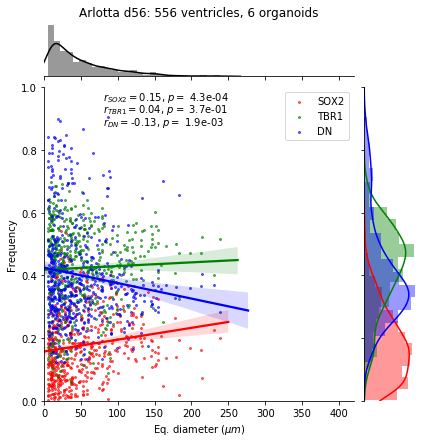

In [406]:
p = sns.JointGrid(x='eq_diam', y='freq', data=df_arlotta_flatten)

sns.regplot(x='eq_diam', y='sox2_freq', data=df_arlotta, ax=p.ax_joint, color='r', scatter_kws={'s': 4, 'alpha': 0.6}, label='SOX2')
sns.regplot(x='eq_diam', y='tbr1_freq', data=df_arlotta, ax=p.ax_joint, color='g', scatter_kws={'s': 4, 'alpha': 0.6}, label='TBR1')
sns.regplot(x='eq_diam', y='dn_freq', data=df_arlotta, ax=p.ax_joint, color='b', scatter_kws={'s': 4, 'alpha': 0.6}, label='DN')

sns.distplot(df_arlotta_flatten['eq_diam'], ax=p.ax_marg_x, color='k')
sns.distplot(df_arlotta['sox2_freq'], ax=p.ax_marg_y, color='r', vertical=True)
sns.distplot(df_arlotta['tbr1_freq'], ax=p.ax_marg_y, color='g', vertical=True)
sns.distplot(df_arlotta['dn_freq'], ax=p.ax_marg_y, color='b', vertical=True)

p.ax_joint.set_xlim([0, 420])
p.ax_joint.set_ylim([0, 1])
p.ax_joint.legend()
p.ax_marg_x.set_title("Arlotta d56: {} ventricles, {} organoids".format(len(df_arlotta), len(df_arlotta['org_idx'].unique())))
p.ax_joint.set_xlabel('Eq. diameter ($\mu m$)')
p.ax_marg_x.set_xlabel(None)
p.ax_joint.set_ylabel('Frequency')
p.ax_marg_y.set_ylabel(None)

# Get pearson correlations

r_sox2, p_sox2 = stats.pearsonr(df_arlotta['eq_diam'], df_arlotta['sox2_freq'])
r_tbr1, p_tbr1 = stats.pearsonr(df_arlotta['eq_diam'], df_arlotta['tbr1_freq'])
r_dn, p_dn = stats.pearsonr(df_arlotta['eq_diam'], df_arlotta['dn_freq'])

p.ax_joint.annotate('$r_{SOX2}=$' + f'{r_sox2:0.2f}, $p=$ {p_sox2:.1e}', [80, 0.96])
p.ax_joint.annotate('$r_{TBR1}=$' + f'{r_tbr1:0.2f}, $p=$ {p_tbr1:.1e}', [80, 0.92])
p.ax_joint.annotate('$r_{DN}=$' + f'{r_dn:0.2f}, $p=$ {p_dn:.1e}', [80, 0.88])

plt.show()

[2 0 1] [0.16666667 0.         0.08333333]


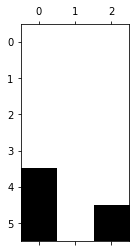

In [359]:
org_names = df_arlotta['org_name'].unique()

R = np.zeros((len(org_names), 3))
P = np.zeros((len(org_names), 3))
for i, org in enumerate(org_names):
    df_org = df_arlotta.where(df_arlotta['org_name'] == org).dropna()    
    r_sox2, p_sox2 = stats.pearsonr(df_org['eq_diam'], df_org['sox2_freq'])
    r_tbr1, p_tbr1 = stats.pearsonr(df_org['eq_diam'], df_org['tbr1_freq'])
    r_dn, p_dn = stats.pearsonr(df_org['eq_diam'], df_org['dn_freq'])
    R[i, :] = np.asarray([r_sox2, r_tbr1, r_dn])
    P[i, :] = np.asarray([p_sox2, p_tbr1, p_dn])

count_sig = (P < 0.05).sum(axis=0)
print(count_sig, count_sig / 12)

plt.spy(P < 0.05)
plt.show()